<a href="https://colab.research.google.com/github/PreyPython123/Master-V24-Semiveiledet-Regresjon/blob/Databehandling-Pradeep/Bioco_Databehandling_av_ekstremverdier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lasting av nødvendige pakker og bibliotek

In [ ]:
! pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190292 sha256=edc62e9b831bb9627c187e32a4207bb08a2bca41694c15872795cbacfe2144ec
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


Importering av nødvendige pakker og bibliotek

In [ ]:
import pandas as pd
import numpy as np
import copy
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns


from pyod.models.hbos import HBOS
from pyod.models.cblof import CBLOF

Importering av data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Velger første kolonne med dato og tid som index
behandlet_data = pd.read_csv('/content/drive/MyDrive/MasterV24/Bioco_data/manglende_data_behandlet_bioco_data.csv',
                             header=0,
                             sep=',',
                             index_col=0)

# Formatterer index til riktig format og datatype
behandlet_data.index = pd.to_datetime(behandlet_data.index,
                                      format='%Y-%m-%d %H:%M:%S')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Inspeksjon av mulige ekstremverdier

Henter prediktorer verdiene som skal undersøkes

In [ ]:
prediktor_data = behandlet_data.iloc[:, :-4]
X = prediktor_data.values

## Violin plot

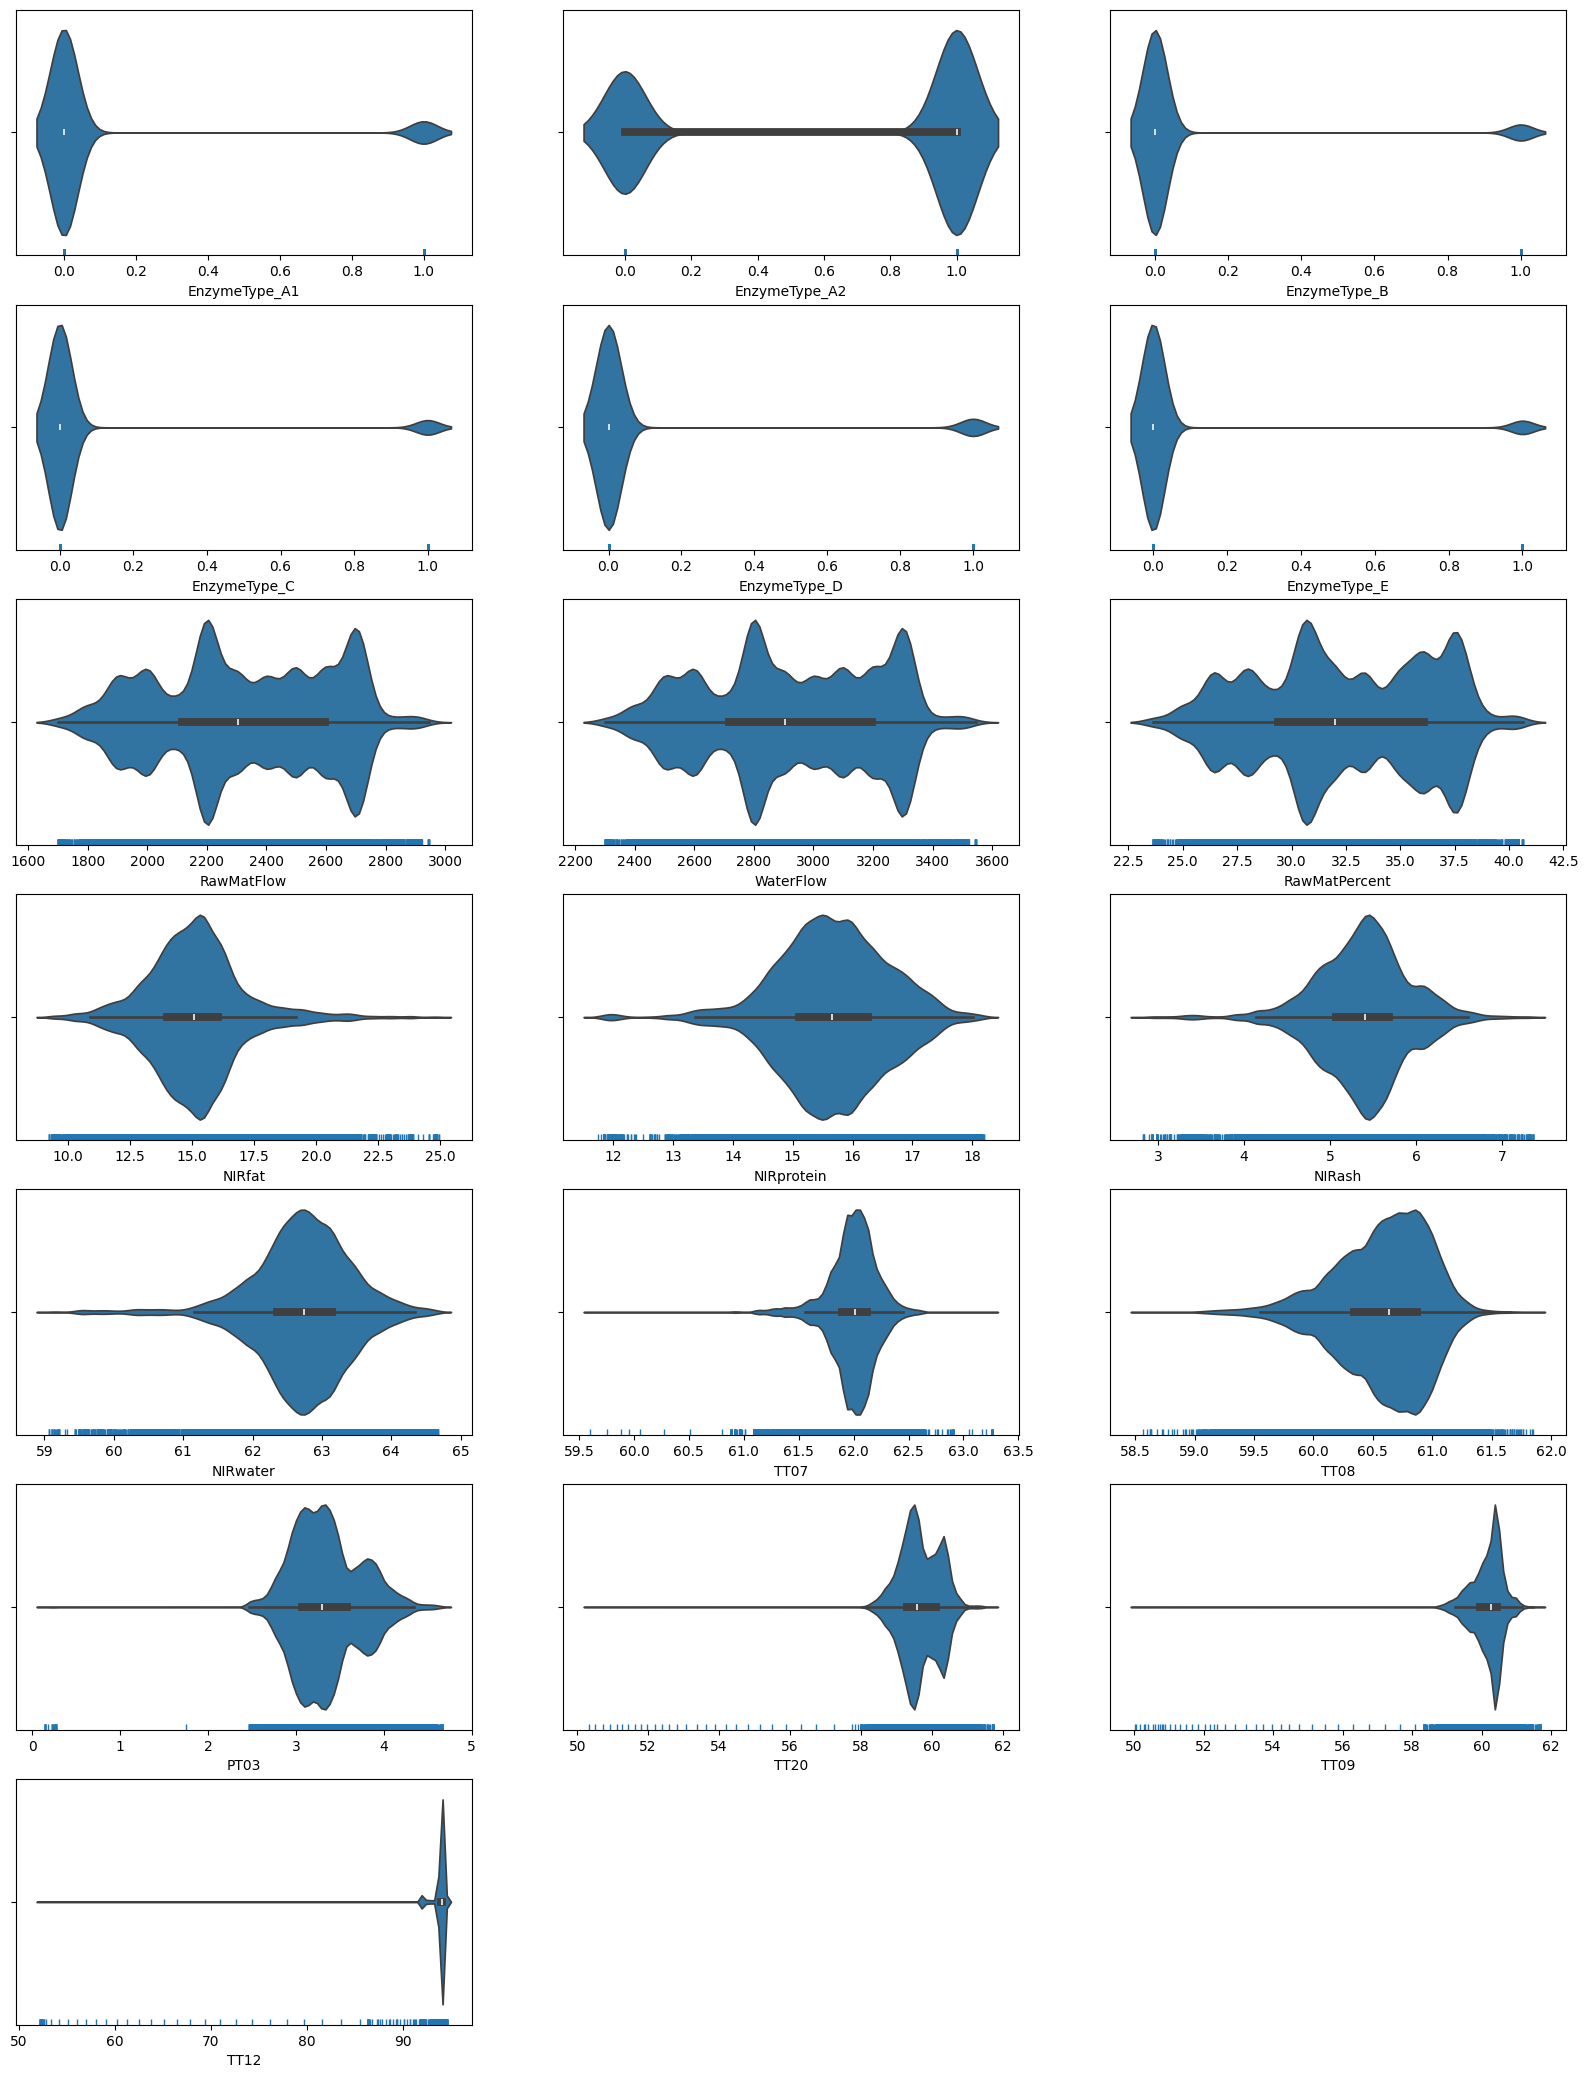

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(prediktor_data.columns)
rute_nett = fig.add_gridspec(7,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.violinplot(x=indeks, data = prediktor_data)
  sns.rugplot(x=prediktor_data[indeks])
  i += 1

## PCA analyse

## Ekstremverdi inspeksjon med HBOS

<ipython-input-16-43a50cbceb4f>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
<ipython-input-16-43a50cbceb4f>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


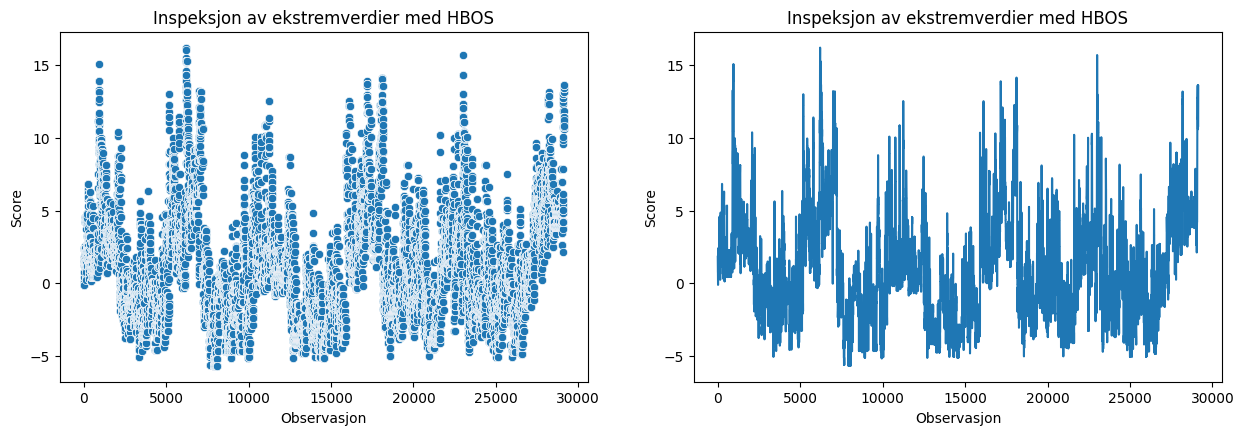

In [ ]:
hbos = HBOS()
hbos.fit(X)

y_predikert = hbos.labels_
y_scores = hbos.decision_scores_

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
plt.subplot(2,2,1)
sns.scatterplot(data=y_scores)
plt.xlabel('Observasjon')
plt.ylabel('Score')
plt.title("Inspeksjon av ekstremverdier med HBOS")

plt.subplot(2,2,2)
plt.plot(list(y_scores))
plt.xlabel('Observasjon')
plt.ylabel('Score')
plt.title("Inspeksjon av ekstremverdier med HBOS")
plt.show()

## Ekstremsverdi inspeksjon med CBLOF

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-18-a8828af13051>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
<ipython-input-18-a8828af13051>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


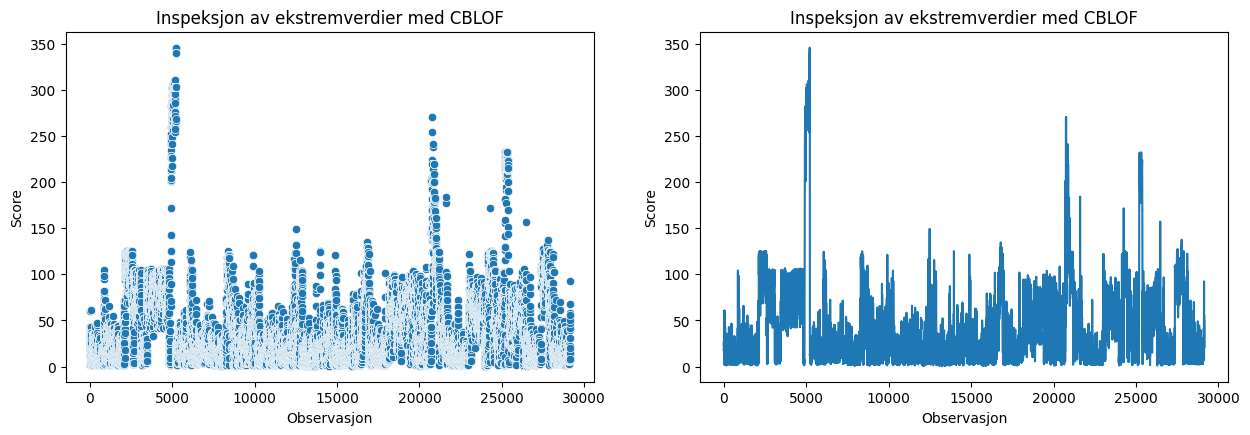

In [ ]:
cblof = CBLOF()
cblof.fit(X)

y_predikert = cblof.labels_
y_scores = cblof.decision_scores_

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
plt.subplot(2,2,1)
sns.scatterplot(data=y_scores)
plt.xlabel('Observasjon')
plt.ylabel('Score')
plt.title("Inspeksjon av ekstremverdier med CBLOF")

plt.subplot(2,2,2)
plt.plot(list(y_scores))
plt.xlabel('Observasjon')
plt.ylabel('Score')
plt.title("Inspeksjon av ekstremverdier med CBLOF")
plt.show()

Ekstremverdi inspeksjon med DBSCAN